In [13]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from collections import Counter, defaultdict

In [2]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
df = df_[df_["cluster"]==5]

def tokenize(dataset, column):
    from nltk.stem import WordNetLemmatizer 
    import re 
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    for comment in dataset[column]:
        comment = re.sub("[^-9A-Za-z ]", "" , comment)
        comment = re.sub(r'https?:\/\/?[a-z0-9]+\.[a-z0-9\/]+', 'URL', comment)
        comment = comment.lower()
        tokens = nltk.word_tokenize(comment)
        for word in comment:
            word = lemmatizer.lemmatize(word) 
        
        tokens = " ".join(tokens)
        tokenized_sentences.append(tokens)
    dataset[column] = tokenized_sentences

tokenize(df, "text")

def remove_stopwords(dataset, column):
    stop_words = set(stopwords.words('english')) 
    sentences=[] 
    for comment in dataset["text"]:
        sentence=[] 
        comment = nltk.word_tokenize(comment)
        for word in comment:
            if word not in stop_words:
                sentence.append(word)
        sentences.append(sentence)
    dataset[column] = sentences

remove_stopwords(df,'text')

df.to_csv("topic_5_tokenized_no_stopwords.csv")

C:\Users\vomit\AppData\Local\Temp\ipykernel_27384\2586828431.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = tokenized_sentences
C:\Users\vomit\AppData\Local\Temp\ipykernel_27384\2586828431.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = sentences


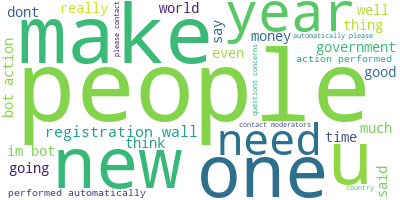

In [3]:
words = " "
for comment in df["text"]:
    for word in comment:
        words += word + " " 

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(words)
wordcloud.to_image()

In [4]:
word_frequencies = Counter()
for sentence in df["text"]:
    for word in sentence:
        word_frequencies[word] += 1
word_frequencies

Counter({'people': 451,
         'like': 327,
         'would': 261,
         'could': 243,
         'get': 242,
         'make': 238,
         'bot': 231,
         'us': 228,
         'users': 224,
         'dont': 221,
         'im': 216,
         'submission': 207,
         'one': 180,
         'wall': 169,
         'registration': 164,
         'need': 162,
         '-': 156,
         'even': 153,
         'please': 151,
         'world': 149,
         'far': 149,
         'years': 148,
         'money': 146,
         'top': 145,
         'new': 144,
         'articles': 144,
         'said': 140,
         'going': 136,
         'contact': 136,
         'best': 131,
         'good': 129,
         'number': 129,
         'much': 128,
         'comments': 128,
         'government': 126,
         'action': 126,
         'behind': 125,
         'time': 123,
         'concerns': 123,
         'questions': 122,
         'free': 122,
         'year': 121,
         '9': 120,
         'wel

In [5]:
df = df_[df_["cluster"]==5]
scoredf = df.sort_values(by=["score"], ascending= False)
for post in scoredf["text"][:200]:
    print(post)

Nurses across England strike in biggest walkout so far
Sweden is building the world's first permanent electrified road for EVs to charge while driving
Bank of England economist says people need to accept they are poorer
An Ominous Heating Event Is Unfolding in the Oceans
Singapore is such a weird place it is seemingly both a utopia and a dystopia.
It's interesting how plainly Biden says these things yet never receives praise for "telling it like it is". I think it's refreshing, personally.
The thing is, I'm not really sure what the FBI can do about this. 

Having worked at several companies now, I have seen how US companies tend to spend their money, and IT is *not* one of those things. IT is overworked, stressed, and gets push-back whenever they try to implement better security because it's "inconvenient".

We have the tools to prevent ourselves from being hacked so much, such as 2FA, narrowly scoped permissions, and adherence to common-sense security policy such as requiring a direct

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("df_w_embeddings_cluster.csv")

In [8]:
df = df[df["cluster"]==5]
df = df[df["type"]== "post"]
df = df[df["subreddit"] != "World News"]
scoredf = df.sort_values(by=["score"], ascending= False)
i =1
while i<100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK", scoredf["url"].iloc[i])
    i+=1

Mobile operating room located in the bus. Created with donations from Romanian citizens 
SUBRED: Ukraine Conflict LINK https://i.redd.it/wpz8c1vw4yua1.jpg
Elon Musk labels NPR as state media, ignores actual state media.... Why, Elon, why? Is this just because Tesla didn't meet your *internal* shipping/delivery timelines? GUUUUH....this guy is exhausting.... 
SUBRED: Ukraine Conflict LINK https://www.newsweek.com/elon-musk-labels-npr-state-media-ignores-actual-state-media-1792771
Discussion/Question Thread 
SUBRED: Ukraine Russia Report LINK https://www.reddit.com/r/UkraineRussiaReport/comments/12bwp6n/discussionquestion_thread/
UA POV: Deputy PM estimates mine clearance cost at $40 Billion and 70 years at current pace. 
SUBRED: Ukraine Russia Report LINK https://v.redd.it/hyhatfpow8xa1
UA POV The 101 people’s APCs project is complete! 
SUBRED: Ukraine Russia Report LINK https://twitter.com/Osinttechnical/status/1651754077636657153?cxt=HHwWgoCw3aHlmuwtAAAA
No money....no...........wait,

IndexError: single positional indexer is out-of-bounds

In [18]:
df= pd.read_csv("df_w_embeddings_cluster.csv")
df = df[df["cluster"]==5]
df = df[df["type"]== "comment"]
df = df[df["subreddit"] != "World News"]
scoredf = df.sort_values(by=["score"], ascending= False)
i =1
while i<100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK", scoredf["url"].iloc[i])
    i+=1

This is pretty crazy, so he is claiming that the reason for the shell shortage is entirely political, artificial shortage, since people from the MOD of jealous of Wagner success. I guess that is possible. I wonder if anything will change now 
SUBRED: Ukraine Russia Report LINK nan
Aren't you supposed to have an economy to participate in  a economic forum. 
SUBRED: Ukraine Russia Report LINK nan
Surely, none of this money will be stolen 😉 
SUBRED: Ukraine Russia Report LINK nan
Soon they will be begging for the next batch. 
SUBRED: Ukraine Russia Report LINK nan
Don't let this get in the way of what all the experts here know is the truth...lmao. This sub gravitates towards the most nonsensical posts, it's clearly become a hive for conspiracy nutters and propaganda victims. 
SUBRED: Ukraine Russia Report LINK nan
it will definitely help him. So useful.

what is the purpose of this act? 
SUBRED: Ukraine Russia Report LINK nan
“Demonstration” it’s like 15 people, lol…. Probably some “Forum

In [9]:
df= pd.read_csv("topic_5_tokenized_no_stopwords.csv")
noworldnews= df[df["subreddit"] != "World News"]
noworldnews[noworldnews["subreddit"]== "World News"]
noworldnews.to_csv("topic_5_tokenized_no_stopwords_noworldnews.csv")

In [12]:
df = pd.read_csv("topic_5_tokenized_no_stopwords_noworldnews.csv")

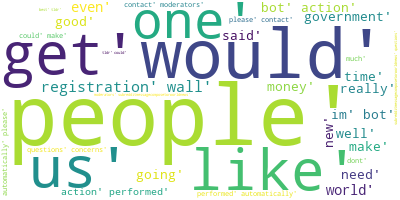

In [15]:
words = " "
for comment in df["text"]:
    for word in comment.split():
        words += word + " " 

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(words)
wordcloud.to_image()

In [16]:
word_frequencies = Counter()
for sentence in df["text"]:
    for word in sentence.split():
        word_frequencies[word] += 1
word_frequencies

Counter({"'people',": 385,
         "'like',": 308,
         "'would',": 239,
         "'could',": 232,
         "'bot',": 230,
         "'make',": 229,
         "'get',": 227,
         "'users',": 218,
         "'submission',": 207,
         "'us',": 201,
         "'im',": 184,
         "'dont',": 171,
         "'wall',": 168,
         "'registration',": 164,
         "'one',": 160,
         "'-',": 155,
         "'top',": 144,
         "'please',": 143,
         "'far',": 142,
         "'articles',": 142,
         "'even',": 141,
         "'need',": 141,
         "'new',": 136,
         "'contact',": 136,
         "'world',": 134,
         "'said',": 132,
         "'number',": 127,
         "'years',": 127,
         "'comments',": 125,
         "'action',": 124,
         "'money',": 124,
         "'behind',": 123,
         "'questions',": 122,
         "'free',": 121,
         "'9',": 114,
         "'going',": 114,
         "'government',": 113,
         "'much',": 112,
         "'au

In [19]:
import pandas as pd
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
topic = df_[df_["cluster"]==5]
topic= topic[topic["subreddit"] != "World News"]
topic["topic"] = "Economic Administration"
topic.to_csv("topic_5_labeled_originaltext.csv")